## Partie 1
Implémenter la méthode des treillis pour le calcul des prix d’options (pour les différents types d’options). 
On testera la méthode sur différentes instances en faisant varier les paramètres (N : le nombre de périodes, r : taux de crédit, d et u). 
On essayera de considérer aussi des instances assez larges. 

In [110]:
import matplotlib.pyplot as plt
import numpy as np

In [111]:
def assetTree(n, S, u, d):  
    asset = np.zeros((n+1,n+1))
    asset[0,0] = S
    for i in range(1,n+1):
        asset[i,0] = asset[i-1,0]*u
        for j in range(1,i+1):
            asset[i,j] = asset[i-1,j-1]*d
    return asset    

In [143]:
def calculationOptionPrice(n, assetValue, K, r, u, d, PutCall, optiontype):
    value = np.zeros((n+1,n+1))
    proba = (1+r-d)/(u-d)
    print(proba)
    
    for j in range(n+1):
        if PutCall=="C": # Call
            payoff = max(0, (assetValue[n,j]-K))
            value[n,j] = payoff
        elif PutCall=="P": #Put
            print(j)
            payoff = max(0, (K-assetValue[n,j]))
            value[n,j] = payoff
    
    if optiontype == "USA":
         for i in range(n-1,-1,-1):
            for j in range(i+1):
                if PutCall=="P":
                    value[i,j] = max(0, K-assetValue[i,j], (1/1+r)*(proba*value[i+1,j]+(1-proba)*value[i+1,j+1]))
                elif PutCall=="C":
                    value[i,j] = max(0, assetValue[i,j]-K, (1/1+r)*(proba*value[i+1,j]+(1-proba)*value[i+1,j+1]))
    
    if optiontype == "EUR":
         for i in range(n-1,-1,-1):
            for j in range(i+1):
                value[i,j] = (1/1+r)*(proba*value[i+1,j]+(1-proba)*value[i+1,j+1])
                    
    return value

In [144]:
asset = assetTree(2, 100, 1.1, 0.9)
print(asset)
print(' ')
print(calculationOptionPrice(2, asset, 91, 0.05, 1.1, 0.9, "C", "EUR"))

[[100.   0.   0.]
 [110.  90.   0.]
 [121.  99.  81.]]
 
0.7499999999999999
[[21.9121875  0.         0.       ]
 [25.725      6.3        0.       ]
 [30.         8.         0.       ]]


In [145]:
def drawAssetTree(asset):
    plt.xlim(0,1) 
    plt.figtext(0.10,0.5,asset[0,0])
    plt.figtext(0.6,0.5+0.20,asset[1,0])
    plt.figtext(0.6,0.5-0.20,asset[1,1])
    
    plt.annotate('',xy=(0.6,0.5+0.25), xytext=(0.1,0.5), arrowprops=dict(facecolor='g',shrink=0.01))
    plt.annotate('',xy=(0.6,0.5-0.25), xytext=(0.1,0.5), arrowprops=dict(facecolor='g',shrink=0.01))
    
    plt.figtext(0.9,0.5+0.35,asset[2,0])
    plt.figtext(0.9,0.5,asset[2,1])
    plt.figtext(0.9,0.5-0.35,asset[2,2])
    
    plt.annotate('',xy=(0.9,0.5+0.40), xytext=(0.7,0.5+0.25), arrowprops=dict(facecolor='g',shrink=0.01))
    plt.annotate('',xy=(0.9,0.5), xytext=(0.7,0.5+0.25), arrowprops=dict(facecolor='g',shrink=0.01))
    
    plt.annotate('',xy=(0.9,0.5), xytext=(0.7,0.5-0.25), arrowprops=dict(facecolor='g',shrink=0.01))
    plt.annotate('',xy=(0.9,0.5-0.4), xytext=(0.7,0.5-0.25), arrowprops=dict(facecolor='g',shrink=0.01))
    
    plt.axis('off')
    plt.show()

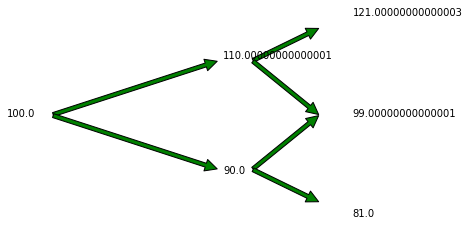

In [146]:
asset = assetTree(2, 100, 1.1, 0.9)
drawAssetTree(asset)